In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [9]:

import matplotlib.pyplot as plt

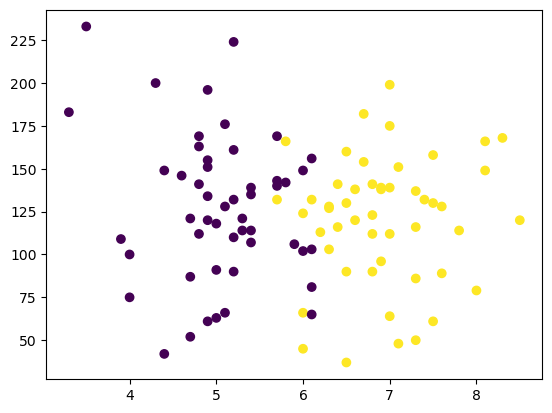

In [10]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y.shape

(100,)

In [14]:
from sklearn.model_selection import train_test_split



In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [17]:
X_train

,cgpa,iq
65,8.1,166.0
16,5.2,224.0
48,6.6,138.0
94,4.7,52.0
41,5.4,114.0
...,...,...
3,7.4,132.0
71,6.1,132.0
57,6.5,130.0
70,6.3,127.0


In [18]:
y_train

65    1
16    0
48    1
94    0
41    0
     ..
3     1
71    1
57    1
70    1
78    0
Name: placement, Length: 90, dtype: int64

In [19]:
X_test

,cgpa,iq
58,8.0,79.0
61,7.3,137.0
54,6.4,141.0
9,5.1,66.0
52,7.0,175.0
18,4.0,100.0
85,5.8,166.0
87,5.7,132.0
35,6.8,90.0
73,4.9,61.0


In [20]:
y_test

58    1
61    1
54    1
9     0
52    1
18    0
85    1
87    1
35    1
73    0
Name: placement, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_train

array([[ 1.86987188,  1.04321227],
       [-0.68663184,  2.50354158],
       [ 0.54754237,  0.3382257 ],
       [-1.12740835, -1.82709019],
       [-0.51032124, -0.2660485 ],
       [ 0.01861056, -0.5681856 ],
       [ 1.42909538,  0.08644478],
       [-2.18527196,  2.73014441],
       [ 1.16462948, -0.97103507],
       [-1.83265076, -0.39193896],
       [-0.68663184, -0.36676087],
       [-1.74449545, -1.24799408],
       [ 0.90016357,  1.87408929],
       [ 0.63569767,  1.44606173],
       [ 0.37123177, -0.21569232],
       [-0.24585534,  0.46411616],
       [-0.59847654, -0.2660485 ],
       [-0.15770004,  0.43893806],
       [ 0.45938707, -0.8703227 ],
       [-0.86294245, -0.16533614],
       [ 0.98831887, -1.92780255],
       [-0.68663184, -0.8703227 ],
       [ 1.34094008, -1.60048736],
       [-0.51032124,  0.26269142],
       [ 0.01861056, -1.4745969 ],
       [-1.03925305,  0.41375997],
       [ 1.60540598, -0.2660485 ],
       [ 0.72385297, -0.03944568],
       [-0.59847654,

In [25]:
X_test = scaler.transform(X_test)

In [26]:
X_test

array([[ 1.78171658, -1.14728171],
       [ 1.16462948,  0.31304761],
       [ 0.37123177,  0.41375997],
       [-0.77478714, -1.4745969 ],
       [ 0.90016357,  1.26981509],
       [-1.74449545, -0.61854179],
       [-0.15770004,  1.04321227],
       [-0.24585534,  0.18715715],
       [ 0.72385297, -0.8703227 ],
       [-0.95109775, -1.60048736]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

In [29]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred = clf.predict(X_test)

In [31]:
y_test

58    1
61    1
54    1
9     0
52    1
18    0
85    1
87    1
35    1
73    0
Name: placement, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.8

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

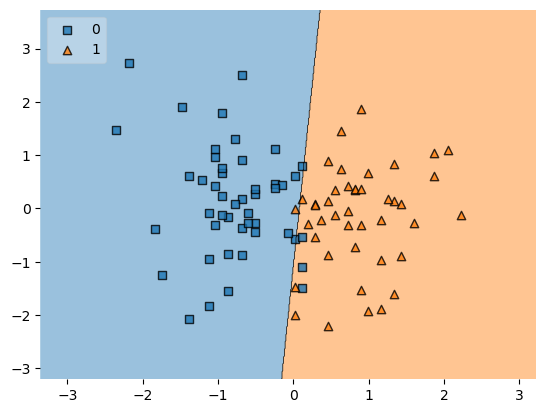

In [36]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [37]:

import pickle

In [38]:
pickle.dump(clf,open('model.pkl','wb'))